# Exercise 1

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics
import time




## Voting data

(kaggle data small)

In [63]:
voting_train = pd.read_csv("CongressionalVotingID.shuf.lrn.csv")
voting_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,15,republican,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
1,326,democrat,n,y,n,n,y,y,n,n,unknown,n,n,y,y,y,n,y
2,93,democrat,y,y,y,n,n,n,y,y,n,y,y,n,n,unknown,y,y
3,350,republican,n,y,y,y,y,y,y,y,y,n,n,y,y,y,n,y
4,283,republican,y,n,n,y,y,y,n,n,n,y,n,unknown,y,y,n,n


In [64]:
voting_test = pd.read_csv("CongressionalVotingID.shuf.tes.csv")
voting_test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,275,y,n,n,y,y,n,y,n,n,y,n,n,n,y,y,y
1,266,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
2,247,n,n,y,n,y,n,y,y,y,n,n,n,n,y,unknown,y
3,328,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
4,232,n,y,n,y,y,y,n,n,y,y,n,y,y,y,n,y


In [65]:
voting_train.shape

(218, 18)

In [66]:
voting_train.groupby("class").size()

class
democrat      147
republican     71
dtype: int64

In [67]:
voting_train = voting_train.set_index("ID")

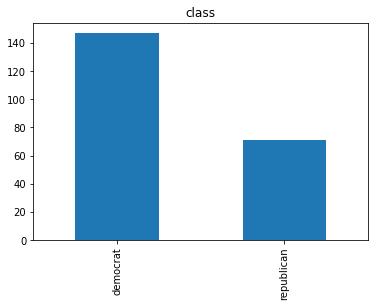

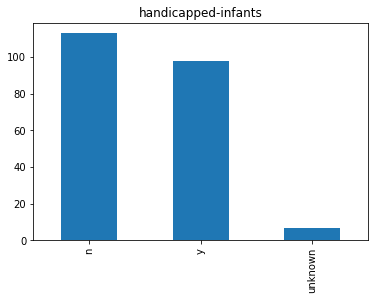

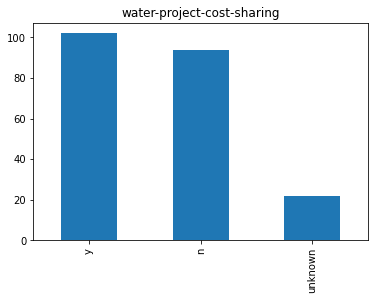

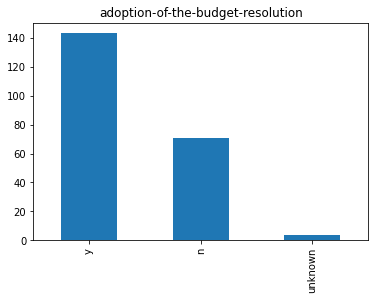

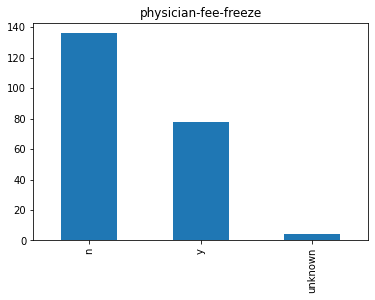

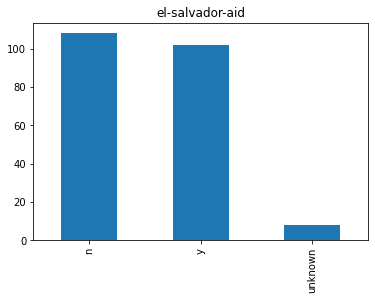

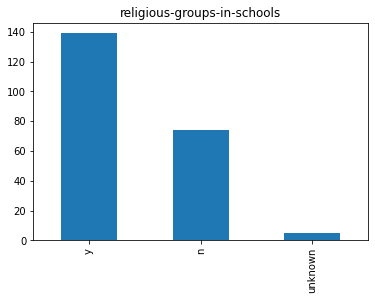

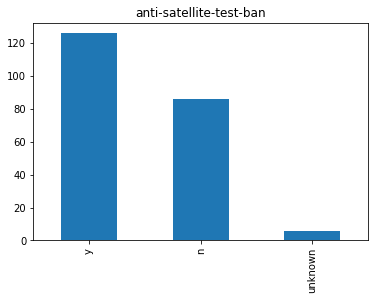

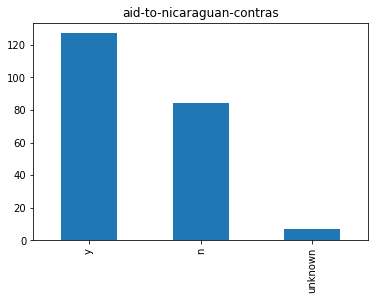

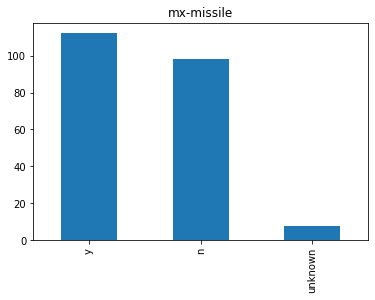

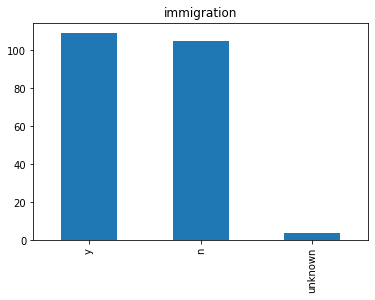

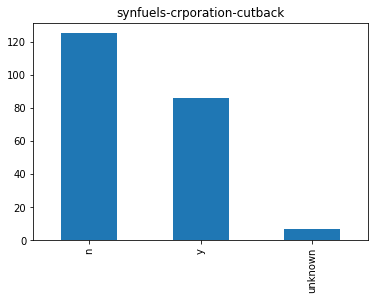

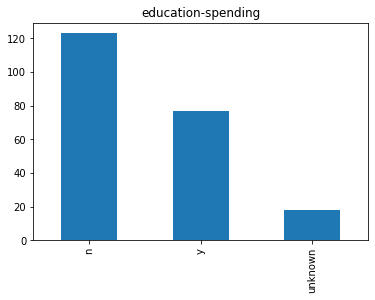

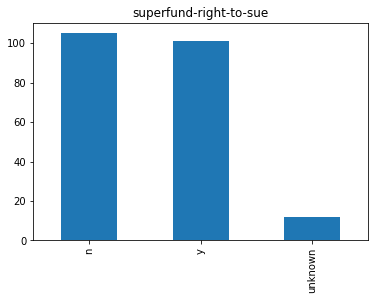

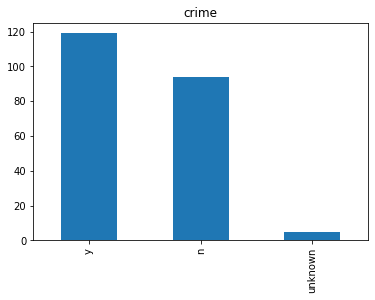

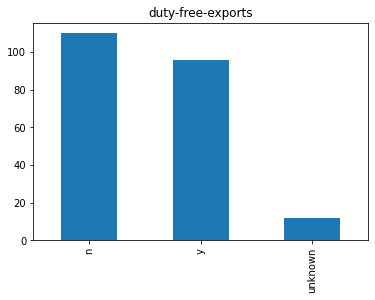

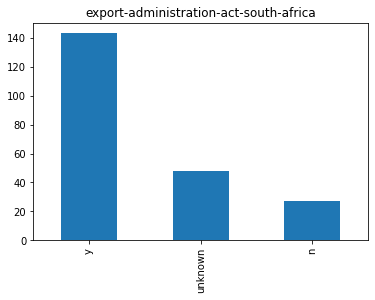

In [9]:
for col in voting_train.columns:
    voting_train[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [70]:
# check if there is a ID where more than 50% is missing
missing_by_id = (voting_train == "unknown").sum(axis=1)

missing_by_id[missing_by_id > 7]

ID
184    15
dtype: int64

In [71]:
index_to_drop = missing_by_id[missing_by_id > 7].index

In [72]:
# remove the one that has only missing infortmation
voting_train = voting_train.drop(index=index_to_drop)

In [73]:
voting_train.columns

Index(['class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [74]:
#voting_train = voting_train.set_index("ID")
le = LabelEncoder()
le.fit(voting_train["handicapped-infants"])
list(le.classes_)

for col in voting_train.columns[1:]:
    voting_train[col] = le.transform(voting_train[col])


In [75]:
voting_train.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
15,republican,0,2,0,2,2,2,0,0,0,0,0,2,1,1,0,1
326,democrat,0,2,0,0,2,2,0,0,1,0,0,2,2,2,0,2
93,democrat,2,2,2,0,0,0,2,2,0,2,2,0,0,1,2,2
350,republican,0,2,2,2,2,2,2,2,2,0,0,2,2,2,0,2
283,republican,2,0,0,2,2,2,0,0,0,2,0,1,2,2,0,0


In [76]:
le_class = LabelEncoder()
le_class.fit(voting_train["class"])
list(le_class.classes_)

voting_train["class"] = le_class.transform(voting_train["class"])


In [77]:

X= voting_train.iloc[:,1:]
y=voting_train["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state= 0)

In [78]:
y_train.value_counts()

0    116
1     57
Name: class, dtype: int64

In [22]:
y_test.value_counts()

0    30
1    14
Name: class, dtype: int64

### Decision Tree

In [80]:
start_time = time.time()
clf = tree.DecisionTreeClassifier(random_state=0,criterion="gini") # defining decision tree classifier
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))


In [81]:
print("confusion matrix:",metrics.confusion_matrix(y_test,prediction))
print("accuracy:",metrics.accuracy_score(y_test,prediction))
print("precision:",metrics.precision_score(y_test,prediction))
print("recall:",metrics.recall_score(y_test,prediction))
print("F1:",metrics.f1_score(y_test,prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[30  0]
 [ 0 14]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


[Text(149.9625, 201.90857142857143, 'X[3] <= 1.5\ngini = 0.442\nsamples = 173\nvalue = [116, 57]'),
 Text(83.7, 170.84571428571428, 'X[3] <= 0.5\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(55.800000000000004, 139.78285714285715, 'X[2] <= 0.5\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(41.85, 108.72, 'X[5] <= 1.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(27.900000000000002, 77.65714285714284, 'X[14] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(13.950000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(41.85, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(55.800000000000004, 77.65714285714284, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(69.75, 108.72, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(111.60000000000001, 139.78285714285715, 'X[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(97.65, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.550000000000

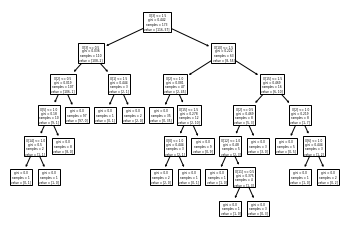

In [27]:
tree.plot_tree(clf)

In [84]:
# FOR kaggle submission

voting_test = voting_test.set_index("ID")

le = LabelEncoder()
le.fit(voting_test["handicapped-infants"])
list(le.classes_)

for col in voting_test.columns:
    voting_test[col] = le.transform(voting_test[col])

# model on all data
clf = tree.DecisionTreeClassifier(random_state=0,criterion="gini") # defining decision tree classifier
clf=clf.fit(X,y) # train 
prediction = clf.predict(voting_test) 

# predict
prediction = le_class.inverse_transform(prediction)

result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]

result.to_csv("voting_test_result.csv")

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [31]:
# different settings
start_time = time.time()
clf = tree.DecisionTreeClassifier(random_state=0,criterion="entropy",max_features=5) # defining decision tree classifier
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,prediction))
print("accuracy:",metrics.accuracy_score(y_test,prediction))
print("precision:",metrics.precision_score(y_test,prediction))
print("recall:",metrics.recall_score(y_test,prediction))
print("F1:",metrics.f1_score(y_test,prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [53]:
# different settings
clf = tree.DecisionTreeClassifier(random_state=0,criterion="entropy",min_samples_split=5) # defining decision tree classifier
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 

print("confusion matrix:",metrics.confusion_matrix(y_test,prediction))
print("accuracy:",metrics.accuracy_score(y_test,prediction))
print("precision:",metrics.precision_score(y_test,prediction))
print("recall:",metrics.recall_score(y_test,prediction))
print("F1:",metrics.f1_score(y_test,prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[30  0]
 [ 0 14]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


### Random forest

In [33]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction))
print("recall:",metrics.recall_score(y_test,rf_prediction))
print("F1:",metrics.f1_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [34]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy")
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction))
print("recall:",metrics.recall_score(y_test,rf_prediction))
print("F1:",metrics.f1_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [36]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction))
print("recall:",metrics.recall_score(y_test,rf_prediction))
print("F1:",metrics.f1_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [106]:
# FOR kaggle submission

# model on all data
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X,y)
rf_prediction = clf.predict(voting_test)

# predict
prediction = le_class.inverse_transform(rf_prediction)
result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]
print(result)
result.to_csv("voting_test_result_RF.csv")

          class
ID             
275  republican
266    democrat
247    democrat
328  republican
232  republican
..          ...
291    democrat
76     democrat
123  republican
416    democrat
309  republican

[217 rows x 1 columns]


### KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train,y_train)
knn_prediction= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction))
print("precision:",metrics.precision_score(y_test,knn_prediction))
print("recall:",metrics.recall_score(y_test,knn_prediction))
print("F1:",metrics.f1_score(y_test,knn_prediction))

cv_scores = cross_val_score(knn,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [48]:
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming")

# Train the model using the training sets
start_time = time.time()
knn.fit(X_train,y_train)
knn_prediction2= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction2))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction2))
print("precision:",metrics.precision_score(y_test,knn_prediction2))
print("recall:",metrics.recall_score(y_test,knn_prediction2))
print("F1:",metrics.f1_score(y_test,knn_prediction2))

cv_scores = cross_val_score(knn,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [49]:
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming",weights="distance")

# Train the model using the training sets
start_time = time.time()
knn.fit(X_train,y_train)
knn_prediction2= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction2))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction2))
print("precision:",metrics.precision_score(y_test,knn_prediction2))
print("recall:",metrics.recall_score(y_test,knn_prediction2))
print("F1:",metrics.f1_score(y_test,knn_prediction2))

cv_scores = cross_val_score(knn,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


## Location data

(kaggle data large)

In [19]:
loc_train = pd.read_csv("Location446-30cls-5k.lrn.csv")
loc_train.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
loc_train.shape

(4000, 448)

In [21]:
loc_test = pd.read_csv("Location446-30cls-5k.tes.csv")
loc_test.head()

,ID,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,4000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4001,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4002,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
len(loc_train["class"].unique())

30

In [22]:
#loc_train = loc_train.set_index("ID")

for c in loc_train.columns:
    print( "---- %s ---" % c)
    print( loc_train[c].value_counts(), "\n\n")

---- ID ---
0       1
2671    1
2658    1
2659    1
2660    1
       ..
1338    1
1339    1
1340    1
1341    1
3999    1
Name: ID, Length: 4000, dtype: int64 


---- class ---
8     250
20    211
21    181
10    173
15    171
6     150
11    149
19    146
17    144
12    142
2     141
4     135
30    135
24    133
1     132
23    128
28    127
27    126
3     124
26    119
9     114
29    113
18    103
13    103
25    100
14     99
22     98
7      90
16     83
5      80
Name: class, dtype: int64 


---- 1 ---
0    3775
1     225
Name: 1, dtype: int64 


---- 2 ---
0    3283
1     717
Name: 2, dtype: int64 


---- 3 ---
0    3808
1     192
Name: 3, dtype: int64 


---- 4 ---
1    2124
0    1876
Name: 4, dtype: int64 


---- 5 ---
0    3616
1     384
Name: 5, dtype: int64 


---- 6 ---
0    3572
1     428
Name: 6, dtype: int64 


---- 7 ---
0    3880
1     120
Name: 7, dtype: int64 


---- 8 ---
0    3773
1     227
Name: 8, dtype: int64 


---- 9 ---
0    3349
1     651
Name: 9, dtype:

In [18]:
#check for missing data
loc_train.isna().sum().sum()

0

## Census income data

(from ex0)

In [4]:
income = pd.read_csv("../Exercise0/Dataset1/adult.data",index_col=False, names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"])
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [114]:
income.shape

(32561, 15)

In [149]:
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [151]:
income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [130]:
for c in income[["workclass","marital_status","occupation","relationship","race","sex","native_country","income"]]:
    
    print( "---- %s ---" % c)
    print(income[c].value_counts(), "\n\n")

---- workclass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 


---- marital_status ---
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 


---- occupation ---
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces        

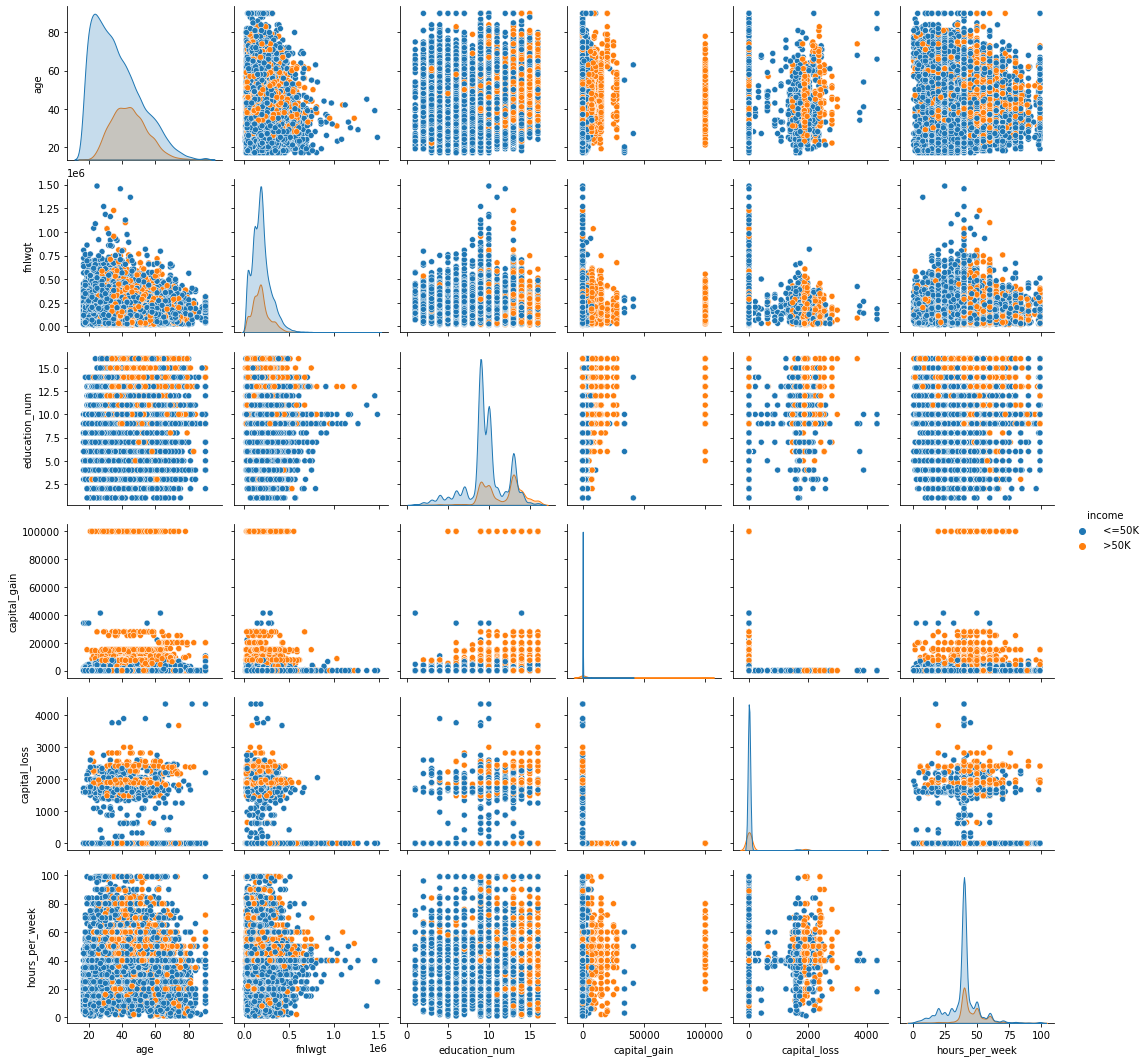

In [131]:
pairplot(income,hue="income")
plt.show()

In [26]:
#onehot
income_dummy = pd.get_dummies(income, columns= ["workclass","education","marital_status","occupation","relationship","race","sex","native_country","income"],
drop_first=True)
income_dummy.drop("education_num",axis=1,inplace=True) # not needed anymore

C:\Users\Lini\Anaconda3\envs\env_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


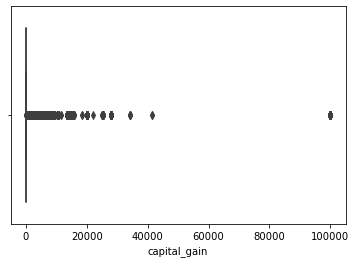

In [27]:
sns.boxplot(income_dummy["capital_gain"])
plt.show()


There are obviously some values that hugely differ from the rest. So either the values at 99999 are encoded as missing values or they are outliers. But probably missing values since they are exactly the same.

In [28]:
# count these high values
(income_dummy.capital_gain == 99999).sum()

159

In [31]:
# first set the values to missing
income_dummy.loc[income_dummy.capital_gain == 99999, "capital_gain"] = np.nan

In [32]:
income_dummy.isna().sum().sum()

159

Split data into training and test set for modelling:

In [36]:
y = income_dummy['income_1']
X = income_dummy.drop('income_1', axis=1)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [45]:
# then impute them by nearest neighbours

imputer = KNNImputer(n_neighbors=3)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp,columns= X_train.columns)

imputer = KNNImputer(n_neighbors=3)
X_test_imp = imputer.fit_transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp,columns= X_test.columns)

In [43]:
y_train.value_counts()

0    18561
1     5859
Name: income_1, dtype: int64

### Random forest

In [57]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction))
print("recall:",metrics.recall_score(y_test,rf_prediction))
print("F1:",metrics.f1_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train_imp,y_train,cv=5)
print("Cross validated scores:",cv_scores)

--- runtime --- 6.166977882385254
confusion matrix: [[5718  441]
 [ 765 1217]]
accuracy: 0.8518609507431519
precision: 0.7340168878166465
recall: 0.6140262361251262
F1: 0.6686813186813187
Cross validated scores: [0.86076986 0.85503686 0.85257985 0.8548321  0.8515561 ]


### SVM

In [58]:
column_transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train_imp)
X_test_sc = column_transformer.fit_transform(X_test_imp)

start_time = time.time()
svm = SVC(kernel='linear')
svm.fit(X_train_sc, y_train)
svm_predictions = svm.predict(X_test_sc)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,svm_predictions))
print("accuracy:",metrics.accuracy_score(y_test,svm_predictions))
print("precision:",metrics.precision_score(y_test,svm_predictions))
print("recall:",metrics.recall_score(y_test,svm_predictions))
print("F1:",metrics.f1_score(y_test,svm_predictions))

cv_scores = cross_val_score(svm,X_train_sc,y_train,cv=5)
print("Cross validated scores:",cv_scores)

--- runtime --- 72.66843605041504
confusion matrix: [[5771  388]
 [ 834 1148]]
accuracy: 0.8498955902223314
precision: 0.7473958333333334
recall: 0.579212916246216
F1: 0.6526435474701535
Cross validated scores: [0.85380835 0.84807535 0.8490991  0.85135135 0.8470516 ]


In [60]:
start_time = time.time()
svm = SVC(kernel='rbf')
svm.fit(X_train_sc, y_train)
svm_predictions = svm.predict(X_test_sc)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,svm_predictions))
print("accuracy:",metrics.accuracy_score(y_test,svm_predictions))
print("precision:",metrics.precision_score(y_test,svm_predictions))
print("recall:",metrics.recall_score(y_test,svm_predictions))
print("F1:",metrics.f1_score(y_test,svm_predictions))

cv_scores = cross_val_score(svm,X_train_sc,y_train,cv=5)
print("Cross validated scores:",cv_scores)

--- runtime --- 74.32163214683533
confusion matrix: [[5798  361]
 [ 830 1152]]
accuracy: 0.8537034762314212
precision: 0.7614011896893589
recall: 0.5812310797174571
F1: 0.6592274678111588
Cross validated scores: [0.86322686 0.8536036  0.85217035 0.85687961 0.85339885]


### NB

In [61]:
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train_imp,y_train)
nb_pred = nb.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

print("confusion matrix:",metrics.confusion_matrix(y_test,nb_pred))
print("accuracy:",metrics.accuracy_score(y_test,nb_pred))
print("precision:",metrics.precision_score(y_test,nb_pred))
print("recall:",metrics.recall_score(y_test,nb_pred))
print("F1:",metrics.f1_score(y_test,nb_pred))

cv_scores = cross_val_score(nb,X_train_imp,y_train,cv=5)
print("Cross validated scores:",cv_scores)

--- runtime --- 0.09200429916381836
confusion matrix: [[5829  330]
 [1395  587]]
accuracy: 0.7881095688490357
precision: 0.6401308615049073
recall: 0.29616548940464177
F1: 0.4049672300793377
Cross validated scores: [0.79197379 0.78972154 0.77886978 0.79115479 0.78644554]


Try the same using label encoding:

In [62]:
income_label = income.copy()

for col in ["workclass","marital_status","occupation","relationship","race","sex","native_country","income"]:
    le = LabelEncoder()
    le.fit(income_label[col])
    income[col] = le.transform(income_label[col])


income_label.drop("education",axis=1,inplace=True) # not needed anymore
income_label

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,13,4,1,1,4,1,2174.0,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0.0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0.0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0.0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0.0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0.0,0,38,39,0
32557,40,4,154374,9,2,7,0,4,1,0.0,0,40,39,1
32558,58,4,151910,9,6,1,4,4,0,0.0,0,40,39,0
32559,22,4,201490,9,4,1,3,4,1,0.0,0,20,39,0


In [63]:
y = income_label['income']
X = income_label.drop('income', axis=1)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [67]:
imputer = KNNImputer(n_neighbors=3)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp,columns= X_train.columns)

imputer = KNNImputer(n_neighbors=3)
X_test_imp = imputer.fit_transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp,columns= X_test.columns)


In [68]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction))
print("recall:",metrics.recall_score(y_test,rf_prediction))
print("F1:",metrics.f1_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train_imp,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[5726  433]
 [ 759 1223]]
accuracy: 0.8535806411988699
precision: 0.7385265700483091
recall: 0.6170534813319879
F1: 0.6723474436503573
Cross validated scores: [0.86261261 0.85872236 0.85810811 0.85421785 0.85626536]


In [69]:
column_transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train_imp)
X_test_sc = column_transformer.fit_transform(X_test_imp)
svm = SVC(kernel='linear')
svm.fit(X_train_sc, y_train)
svm_predictions = svm.predict(X_test_sc)

print("confusion matrix:",metrics.confusion_matrix(y_test,svm_predictions))
print("accuracy:",metrics.accuracy_score(y_test,svm_predictions))
print("precision:",metrics.precision_score(y_test,svm_predictions))
print("recall:",metrics.recall_score(y_test,svm_predictions))
print("F1:",metrics.f1_score(y_test,svm_predictions))

cv_scores = cross_val_score(svm,X_train_sc,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[5976  183]
 [1332  650]]
accuracy: 0.8139049256848053
precision: 0.78031212484994
recall: 0.32795156407669024
F1: 0.46181172291296624
Cross validated scores: [0.81818182 0.81470106 0.81244881 0.81900082 0.81347256]


In [70]:
nb = GaussianNB()
nb.fit(X_train_imp,y_train)
nb_pred = nb.predict(X_test_imp)

print("confusion matrix:",metrics.confusion_matrix(y_test,nb_pred))
print("accuracy:",metrics.accuracy_score(y_test,nb_pred))
print("precision:",metrics.precision_score(y_test,nb_pred))
print("recall:",metrics.recall_score(y_test,nb_pred))
print("F1:",metrics.f1_score(y_test,nb_pred))

cv_scores = cross_val_score(nb,X_train_imp,y_train,cv=5)
print("Cross validated scores:",cv_scores)

confusion matrix: [[5830  329]
 [1395  587]]
accuracy: 0.788232403881587
precision: 0.6408296943231441
recall: 0.29616548940464177
F1: 0.4051069703243616
Cross validated scores: [0.79197379 0.79033579 0.77989353 0.79176904 0.78644554]


## Eucalyptus